# Supervised Learning with scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Main concepts

- the predicted values are known
- aim: Predict the target values of unseen data, given the features
- supervised learning uses features to predict the value of a target

### Types of supervised learning:
- classification (target variable consists of ***categories***). For example, whether the transaction is fraudulent or not (binary classification).

- regression (target variable is ***continuous***). For example model can use features such as number of bedrooms and the size of a property to predict the target variable: price of the property

Feature == predictor variable == independent variable

Target variable == dependent variable == response variable

### Before you use supervised learning

Requirements:
- no missing values
- data in numeric format
- data stored in pandas DataFrame or NumPy array

Must perform Exploratory Data Analysis (EDA) first

### scikit-learn syntax

In [3]:
# from sklearn.module import Model
# model = Model()
# model.fit(X, y)

# predictions = model.predict(X_new)
# print(predictions)

## The classification challenge

Classifying labels of unseen data:
1) Build a model
2) Model learns from the labeled data we pass it on (training data)
3) Pass unlabeled data to the model as input
3) Model predicts the labels of the unseen data

### k-Nearest Neighbors

Helpful for classification problems

The idea - predict the label of a data point by
- looking at the k closest labeled data points
- taking a majority of vote

In [4]:
import pandas as pd
import numpy as np
churn_df = pd.read_csv("databases/telecom_churn.csv")

#We use .values to convert X and y in numpy arrays as it is required by the kNN
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])

predictions = knn.predict(X_new)
print(f"Predictions: {predictions}")

(3333, 2) (3333,)
Predictions: [1 0 0]


## Measuring model performance - classification

in classification accuracy is a commonly used metric

It is important not to calculate accuracy on the model with whichwe fit data as it isn't reliable 


1) Split data into Training set and Test set
2) Fit classifier on training set
3) Calculate accuracy using test set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21,
                                                    stratify=y) 
                        #to have equal amount of churned clients in both training and test set
#four arrays are returned

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.872


We get an accuracy of 88%. It is low cause our data has a 9 to 1 ratio

**Model complexity:**

Larger k = less complex model = can cause underfitting

Smaller k = more complex model = can lead to overfitting

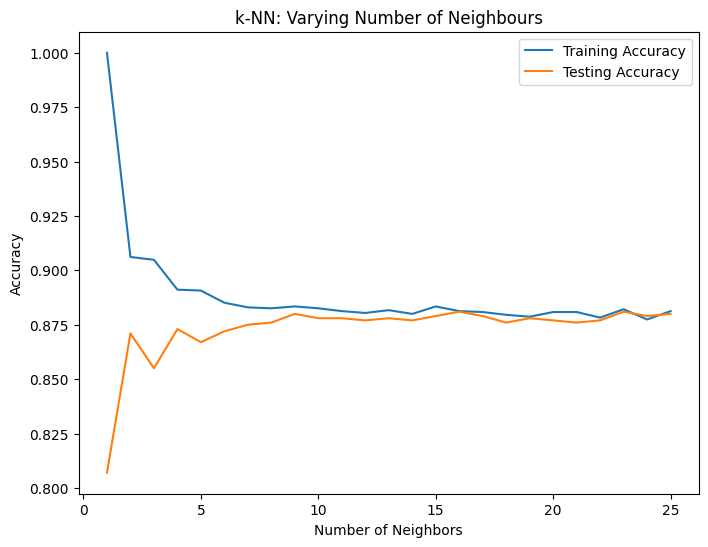

In [6]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.title("k-NN: Varying Number of Neighbours")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

## Introduction to regression

Continuous targets like the price of a house or country's GDP

In [3]:
import pandas as pd
diabetes_df = pd.read_csv("databases/diabetes_clean.csv")
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = diabetes_df.drop("glucose", axis=1).values #converting to array
y = diabetes_df["glucose"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
#Trying to use a single feature - bmi
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape) #Features must be at least 2d arrays to be accepted by sckitit-learn

X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(768,) (768,)
(768, 1)


Text(0.5, 0, 'Body Mass Index')

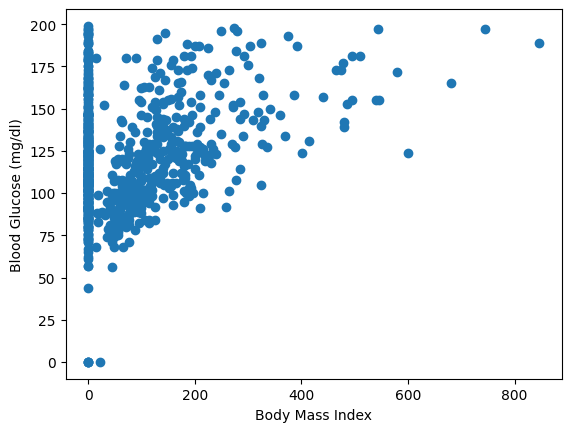

In [10]:
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")

### Linear regression (model)

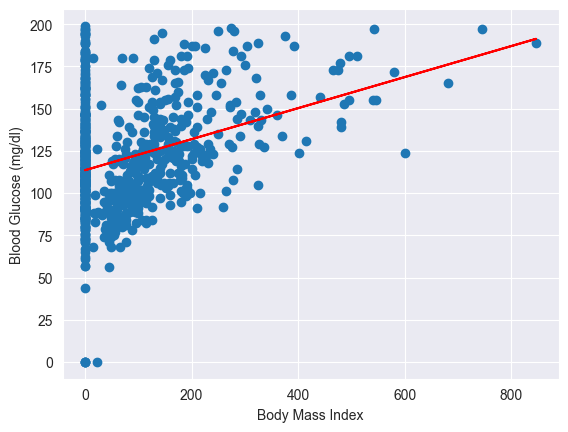

In [11]:
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color="red")
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### Linear regression using all features

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

Metric - **R squared** (1 - features completely explain target variables)

In [9]:
R = reg_all.score(X_test, y_test) #to calculate R squared
print(R)

0.28280468810375115


**MSE** is measured in targets units, squared

To convert to a value itself (without being squared), we use **RMSE** = MSE^(1/2)

In [10]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=False)

c:\Users\Маша\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


26.341459582232265

## Cross-validation

Cross-validation motivation
- model performance is dependent on the way we split up the data
- Not representative of the model's ability to generalize to unseen data

The idea is to split up data into 5 folds (groups)

In [15]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()

#calculates R squared by using .score automatically
cv_results = cross_val_score(reg, X, y, cv=kf)

print(np.mean(cv_results))
print(cv_results.std())
print(np.quantile(cv_results, [0.025, 0.975]))

0.3190969786734479
0.0701532061011419
[0.24088592 0.41580685]


## Regularized regression

Basically the idea is that this approach help you to avoid overfitting your model with too many features

**Ridge regression**
- ridge penalizes large positive or negative coefficients

In [13]:
from sklearn.linear_model import Ridge

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.28284666232222233, 0.28320633574804766, 0.2853000732200003, 0.26423984812668155, 0.19292424694100963]


**Lasso regression**
- select important features 
- shrink the coefficients of less important features to zero 

In [17]:
from sklearn.linear_model import Lasso

scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


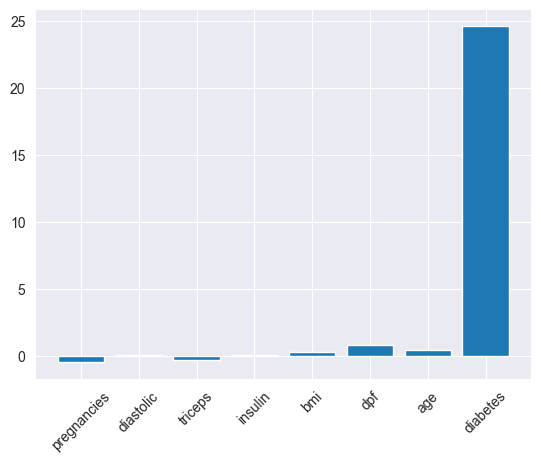

In [18]:
#Another Example
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

## How good is your model?

**Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial.**

We have used accuracy to measure the qualite of classification model, however there is a problem called **class imbalance** (Uneven frequency of classes). For exampke 99% transactions are legitimate and only 1% is fraudulent, so if we build a model, which always tells us that the transaction a legitimate we will get an accuracy of 99% even though the model will be awful.

***Another way to assess a model - a Confusion Matrix:***

<table>
    <thead>
        <th></th>
        <th>Predicted: Legitimate</th>
        <th>Predicted Fraudulent</th>
    </thead>
    <tbody>
        <tr>
            <td>
            <b>Actual: Legitimate</b>
            </td>
            <td>True Negative</td>
            <td>False Positive</td>
        </tr>
        <tr>
            <td>
            <b>Actual: Fraudelent</b>
            </td>
            <td>False Negative</td>
            <td>True Positive</td>
        </tr>
    </tbody>
</table>

True Positive - the number of fraudulent transactions correctly labeled and True Negative is a number of legitimate transactions correctly labeled

accuracy = (TP + TN) / (TP + TN + FP + FN)

precisions = TP / (TP + FP) - how many legitimate transactions we expected to be fraudulent

recall/sensativity = TP / TP + FN - the amount of fraudulent transactions predicted correctly

F1 Score: 2 * (precision * recall) / (precision + recall)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn.fit(X_train ,y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Logistic regression and the ROC curve

- logistic regression is used for classification problems
- logistic regression outputs probabilities
- if y > 0.5 we assign it to 1, else to 0

In [ ]:
from sklearn.linear_model import LogisticRegression
logred = LogisticRegression(max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
logred.fit(X_train, y_train)
y_pred = logred.predict(X_test)
y_pred_probs = logred.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

**ROC curve**

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1 ], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.6870364174914934


## Hyperparameter tuning

Parameters we specify before fitting the model are called **hyperparameters** like alpha or n_neighbors

***Grid search cross-validation***

In [37]:
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha":np.arange(0.001, 1, 10),
              "solver": ["sag", "lsqr"]}
ridge = Ridge(max_iter=10000)
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.001, 'solver': 'lsqr'} 0.3041066481334971


**Limitatuions and an alternative approach - RandomizedSearchCV**

In [36]:
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10),
              "solver":["sag", "lsqr"]}
ridge = Ridge(max_iter=10000)
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.0001} 0.30410655619577953


## Preprocessing data

For dealing with categorical features we can either use
- scikit-learn ```OneHotEncoder()```
- pandas ```get_dummies()```

If we have a single categorical column in a df, we can avoid specifying the exact column as ```get_dummies()``` will deal with it on it's own

In [57]:
fish = pd.read_csv("databases/fish.csv", index_col=0)

fish = fish.reset_index()

fish_dummies = pd.get_dummies(fish["species"], drop_first=True) #drop_first to exclude last columns as it simply means that all othe values are false

fish_dummies = pd.concat([fish, fish_dummies], axis=1)
fish_dummies = fish_dummies.drop("species", axis=1)
fish_dummies.head()

,mass_g,length_cm,Perch,Pike,Roach
0,242.0,23.2,False,False,False
1,290.0,24.0,False,False,False
2,340.0,23.9,False,False,False
3,363.0,26.3,False,False,False
4,430.0,26.5,False,False,False


## Handling missing data

**Drop data**

In [ ]:
climate = pd.read_csv("databases/countries-of-the-world.csv")
missing_climate = climate.isna().sum().sort_values(ascending=False)[:9]
print(missing_climate)

climate = climate.dropna(subset=["Climate", "Literacy (%)", "Industry"])
climate.isna().sum().sort_values(ascending=False)

**Imputing values**

In [ ]:
music_df = pd.read_csv("databases/music_clean_csv")

from sklearn.impute import SimpleImputer
X_cat = music_df["genre"].values.reshape(-1, 1)
X_num = music_df.drop(["genre", "popularity"], axis=1).values
y = music_df["popularity"].values

X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size = 0.2, random_state = 12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size = 0.2, random_state = 12)

imp_cat = SimpleImputer(strategy="most_frequent")
X_train_cat = imp_cat.fit_transorm(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

imp_num = SimpleImputer()
X_train_num = imp_num.fit_transorm(X_train_num)
X_test_num = imp_num.transform(X_test_num)

X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)

In [ ]:
from sklearn.pipeline import Pipeline
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

steps = [("imputation", SimpleImputer()),
          ("logistic_regression", LogisticRegression())]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

## Centering and scaling

**How to scale our data:**
- substract the mean and divide by variance - standartization
- substract the minimum and divide by the range
- can normalize so the data ranges from -1 to 1


In [ ]:
from sklearn.preprocessing import StandardScaler
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

Using pipeline

In [ ]:
steps = [("scaler", StandardScaler()),
          ("knn", KNeighborsClassifier(n_neighbors=6))]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.score(X_test, y_test)

CVand scaling in a pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
steps = [("scaler", StandardScaler()),
          ("knn", KNeighborsClassifier(n_neighbors=6))]

pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

## Evaluating miltiple models

**Regression model performance:**
- RMSE
- R-squared

**Classification model performance:**
- Accuracy
- Confusion Matrix
- Precision, recall, F1-score
- ROC AUC

**Models affected by scaling:**
- KNN
- Linear Regression (plus Ridge, Lasso)
- Logistic Regression
- Artificial Neural  Network

In [2]:
import pandas as pd
music_df = pd.read_csv("databases/music_clean.csv")
music_df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


c:\Users\Маша\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Маша\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

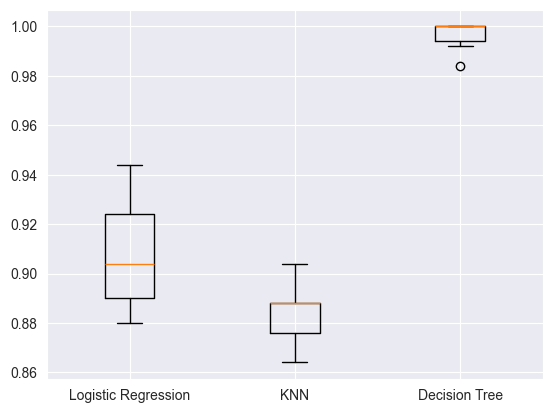

In [84]:
music_df = pd.read_csv("databases/music_clean.csv")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {"Logistic Regression": LogisticRegression(max_iter=10000), "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier()}

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

# Predictive Modeling for Agriculture (Don't run)

In [1]:
import pandas as pd
crops = pd.read_csv("databases/soil_measures.csv")

In [ ]:
#Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

#Preprocessing data
print(crops.isna().sum())

print(crops.head())
X = crops.drop("crop", axis=1)
y= crops["crop"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

#We could have use a confusion_matrix, bit it isn't binary classification

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

#We can use classification_report, but even better to use f1_score

results = []
for feature in ["N", "K", "P", "ph"]:
    model = LogisticRegression(max_iter=3000)
    model.fit(X_train[[feature]], y_train)
    y_pred = model.predict(X_test[[feature]])
    score = metrics.f1_score(y_test, y_pred, average="weighted")
    results.append({feature: score})
    
print(results)